#Augmentasi SBert_data STS Indonsia

##1. Instalasi Library yang di perlukan

In [ ]:
# Install necessary libraries
!pip install transformers sentence-transformers
!pip install transformers[torch]
!pip install accelerate -U
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

##2. Import Library dan Dataset

In [ ]:
from datasets import Dataset, DatasetDict
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

# Langkah 1: Memuat data dan model
file_path = '/content/Indo_stsbenchmark_decompressed.tsv'
data = pd.read_csv(file_path, sep='\t', header=0)

In [ ]:
data

,split,genre,dataset,year,sid,score,sentence1,sentence2
0,train,main-captions,MSRvid,2012test,4,3.80,Seorang pria sedang memainkan seruling besar.,Seorang pria sedang memainkan seruling.
1,train,main-captions,MSRvid,2012test,5,3.80,Seorang pria sedang mengoleskan keju parut di ...,Seorang pria sedang mengoleskan keju parut di ...
2,train,main-captions,MSRvid,2012test,6,2.60,Tiga pria sedang bermain catur.,Dua pria sedang bermain catur.
3,train,main-captions,MSRvid,2012test,9,4.25,Seorang pria sedang memainkan cello.,Seorang pria yang duduk sedang memainkan cello.
4,train,main-captions,MSRvid,2012test,11,4.25,Beberapa pria sedang berkelahi.,Dua pria sedang berkelahi.
...,...,...,...,...,...,...,...,...
8146,test,main-news,MSRpar,2012train,657,4.00,Jadi dalam pidato kenegaraannya pada bulan Jan...,"Dalam pesan kenegaraannya tanggal 28 Januari, ..."
8147,test,main-news,MSRpar,2012train,666,4.00,24 anggota lainnya terbagi antara perwakilan i...,"Dari 24 direktur yang bukan eksekutif bursa, s..."
8148,test,main-news,MSRpar,2012train,669,2.75,Keuskupan Episkopal Florida Tengah menjadi sal...,Keuskupan Episkopal Florida Tengah melakukan p...
8149,test,main-news,MSRpar,2012train,679,2.25,McGill juga merinci lubang yang telah dibuat d...,McGill juga mengatakan sarung tangan berwarna ...


###Cross Encoder Model

In [ ]:
cross_encoder_model_name = 'cross-encoder/ms-marco-MiniLM-L-6-v2'
bi_encoder_model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'

In [ ]:
cross_encoder = AutoModelForSequenceClassification.from_pretrained(cross_encoder_model_name)
cross_encoder_tokenizer = AutoTokenizer.from_pretrained(cross_encoder_model_name)

bi_encoder = SentenceTransformer(bi_encoder_model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

##3. Melakukan pelabelan dengan cross-encoder

In [ ]:
# Langkah 2: Melakukan pelabelan dengan cross-encoder
def label_with_cross_encoder(sentences1, sentences2):
    inputs = cross_encoder_tokenizer(sentences1, sentences2, padding=True, truncation=True, return_tensors="pt")
    outputs = cross_encoder(**inputs)
    scores = outputs.logits.detach().numpy()
    return scores.flatten()  # Ensure it's a flat list


###Membagi data menjadi Train, Test dan Dev

In [ ]:
# Menyiapkan data pelatihan dan validasi
train_data = data[data['split'] == 'train']
dev_data = data[data['split'] == 'dev']
test_data = data[data['split'] == 'test']

In [ ]:
train_data

,split,genre,dataset,year,sid,score,sentence1,sentence2
0,train,main-captions,MSRvid,2012test,4,3.80,Seorang pria sedang memainkan seruling besar.,Seorang pria sedang memainkan seruling.
1,train,main-captions,MSRvid,2012test,5,3.80,Seorang pria sedang mengoleskan keju parut di ...,Seorang pria sedang mengoleskan keju parut di ...
2,train,main-captions,MSRvid,2012test,6,2.60,Tiga pria sedang bermain catur.,Dua pria sedang bermain catur.
3,train,main-captions,MSRvid,2012test,9,4.25,Seorang pria sedang memainkan cello.,Seorang pria yang duduk sedang memainkan cello.
4,train,main-captions,MSRvid,2012test,11,4.25,Beberapa pria sedang berkelahi.,Dua pria sedang berkelahi.
...,...,...,...,...,...,...,...,...
5648,train,main-news,headlines,2016,1456,0.00,Angin Kencang Saat Badai Clodagh Melanda Inggris,Merkel menjanjikan solidaritas NATO dengan Latvia
5649,train,main-news,headlines,2016,1465,0.00,Puluhan warga Mesir disandera oleh teroris Lib...,Korban tewas akibat kecelakaan kapal di Mesir ...
5650,train,main-news,headlines,2016,1466,0.00,Presiden menuju ke Bahrain,Presiden Xi: Tiongkok akan terus membantu meme...
5651,train,main-news,headlines,2016,1470,0.00,Tiongkok dan India berjanji untuk melanjutkan ...,Tiongkok Berusaha Meyakinkan Para Pedagang Sah...


###Memisahkan Sentence 1, 2 dan Score

In [ ]:
train_sentences1 = train_data['sentence1'].tolist()
train_sentences2 = train_data['sentence2'].tolist()
train_labels = train_data['score'].astype(float).tolist()

dev_sentences1 = dev_data['sentence1'].tolist()
dev_sentences2 = dev_data['sentence2'].tolist()
dev_labels = dev_data['score'].astype(float).tolist()

test_sentences1 = test_data['sentence1'].tolist()
test_sentences2 = test_data['sentence2'].tolist()
test_labels = test_data['score'].astype(float).tolist()

# Konversi label kontinu ke biner (0 dan 1)
train_labels = [1 if label > 2.5 else 0 for label in train_labels]
dev_labels = [1 if label > 2.5 else 0 for label in dev_labels]
test_labels = [1 if label > 2.5 else 0 for label in test_labels]

##4. Membuat Dataset Baru yang belum di labeling yang nantinya digunakan untuk Silver Dataset

In [ ]:
# Melakukan pelabelan pada pasangan kalimat baru (gunakan sebagian data untuk augmentasi)
additional_sentences1 = train_sentences1[:100]  # Contoh pengambilan sebagian data
additional_sentences2 = train_sentences2[:100]
silver_labels = label_with_cross_encoder(additional_sentences1, additional_sentences2)
silver_labels = [1 if label > 2.5 else 0 for label in silver_labels]  # Konversi ke biner

In [ ]:
# Gabungkan dataset asli dengan dataset tambahan
all_sentences1 = train_sentences1 + additional_sentences1
all_sentences2 = train_sentences2 + additional_sentences2
all_labels = train_labels + silver_labels

##5. Menggabungkan Dataset Gold dan Silver

In [ ]:
# Langkah 3: Menggabungkan dataset asli dengan dataset tambahan (silver dataset)
train_examples = [InputExample(texts=[s1, s2], label=float(label)) for s1, s2, label in zip(all_sentences1, all_sentences2, all_labels)]

##6. Melatih Bi_encoder dengan Dataset Baru

In [ ]:
# Langkah 4: Melatih bi-encoder pada dataset yang diperbesar
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model=bi_encoder)

# Fine-tuning bi-encoder
bi_encoder.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100)

Step,Training Loss


##Menyimpan Hasil Model

In [ ]:
# Simpan model yang telah dilatih
bi_encoder.save("augmented-sbert-model")

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

##Melakukan Evaluasi Model

In [ ]:
# Evaluasi
def evaluate_model(model, sentences1, sentences2, true_labels):
    pred_labels = []
    for s1, s2 in zip(sentences1, sentences2):
        embedding1 = model.encode(s1)
        embedding2 = model.encode(s2)
        similarity = model.similarity(embedding1, embedding2)
        pred_labels.append(similarity)

    pred_labels = [1 if label > 0.5 else 0 for label in pred_labels]  # Threshold for binary classification
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='binary')

    return accuracy, precision, recall, f1

In [ ]:
# Menghitung metrik untuk dataset validasi
dev_accuracy, dev_precision, dev_recall, dev_f1 = evaluate_model(bi_encoder, dev_sentences1, dev_sentences2, dev_labels)
print(f'Validation Accuracy: {dev_accuracy}')
print(f'Validation Precision: {dev_precision}')
print(f'Validation Recall: {dev_recall}')
print(f'Validation F1 Score: {dev_f1}')

# Menghitung metrik untuk dataset uji
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(bi_encoder, test_sentences1, test_sentences2, test_labels)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

Validation Accuracy: 0.8116560056858564
Validation Precision: 0.7485380116959064
Validation Recall: 0.927536231884058
Validation F1 Score: 0.8284789644012944
Test Accuracy: 0.7876838235294118
Test Precision: 0.7403973509933774
Test Recall: 0.9410774410774411
Test F1 Score: 0.8287620459599704


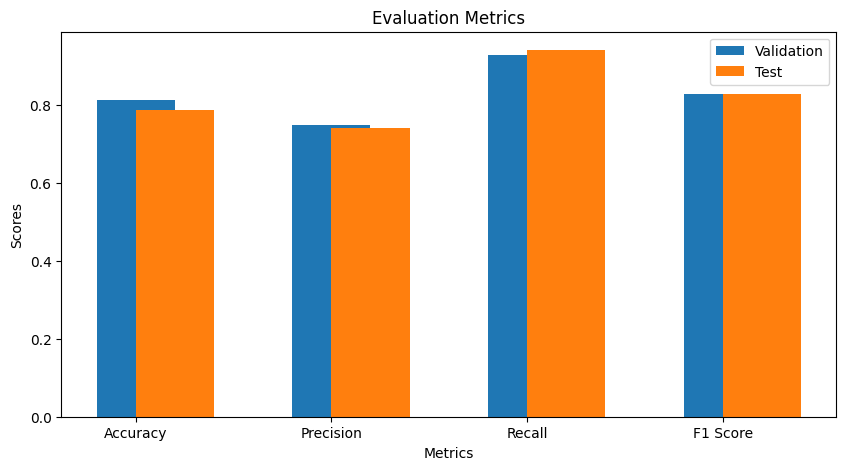

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dev_scores = [dev_accuracy, dev_precision, dev_recall, dev_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

x = range(len(metrics))

plt.figure(figsize=(10, 5))
plt.bar(x, dev_scores, width=0.4, label='Validation', align='center')
plt.bar(x, test_scores, width=0.4, label='Test', align='edge')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.xticks(x, metrics)
plt.legend()
plt.show()